In [49]:
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
import matplotlib as plt
from shapely import geometry
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import matplotlib.pyplot as plt

address = '30 Aldwych, London WC2B 4BG'
G = ox.graph_from_address(address, network_type="drive")

nodes, edges = ox.graph_to_gdfs(G)

In [50]:
points = list(nodes.geometry)

In [68]:
pointList = np.asarray(list([(p.x, p.y) for p in points]))

In [69]:
pointList

array([[-0.1303251, 51.5203679],
       [-0.11332  , 51.5215137],
       [-0.1113814, 51.5181757],
       ...,
       [-0.1209443, 51.5162152],
       [-0.1173426, 51.5145739],
       [-0.1036707, 51.5181285]])

In [70]:
hull = ConvexHull(pointList)


In [74]:
polygon = []

In [82]:
hull.vertices

array([215, 581,  96, 292,  98, 360,  52, 510,  25, 696, 333,  20, 559,
       558, 311, 250, 391], dtype=int32)

In [86]:
hull_points = pointList[hull.vertices, :]

In [90]:
correct_hull_poinnts = []

for p in hull_points:
    correct_hull_poinnts.append([p[1], p[0]])

In [91]:
correct_hull_poinnts

[[51.5048002, -0.1030135],
 [51.5110044, -0.1027781],
 [51.5192653, -0.1030011],
 [51.521612, -0.1065756],
 [51.5217222, -0.1134957],
 [51.5217342, -0.1176652],
 [51.5214109, -0.1314657],
 [51.5154426, -0.1316153],
 [51.5095659, -0.131587],
 [51.5080763, -0.1313862],
 [51.5071559, -0.1311472],
 [51.5058624, -0.130808],
 [51.5047288, -0.1264924],
 [51.5046977, -0.1262929],
 [51.5037826, -0.111736],
 [51.5038922, -0.1087246],
 [51.5043666, -0.1044935]]

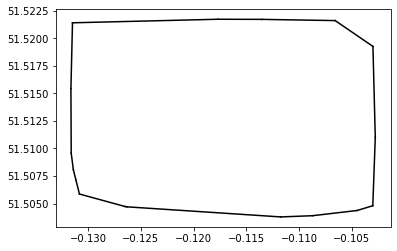

In [75]:
# plt.plot(pointList[:,0], pointList[:,1], 'o')
for simplex in hull.simplices:
    polygon.append([pointList[simplex, 0], pointList[simplex, 1]])
    plt.plot(pointList[simplex, 0], pointList[simplex, 1], 'k-')

In [76]:
polygon

[[array([-0.1030135, -0.1027781]), array([51.5048002, 51.5110044])],
 [array([-0.1314657, -0.1316153]), array([51.5214109, 51.5154426])],
 [array([-0.1030011, -0.1027781]), array([51.5192653, 51.5110044])],
 [array([-0.1030011, -0.1065756]), array([51.5192653, 51.521612 ])],
 [array([-0.131587 , -0.1316153]), array([51.5095659, 51.5154426])],
 [array([-0.1262929, -0.111736 ]), array([51.5046977, 51.5037826])],
 [array([-0.1044935, -0.1030135]), array([51.5043666, 51.5048002])],
 [array([-0.1176652, -0.1314657]), array([51.5217342, 51.5214109])],
 [array([-0.1313862, -0.131587 ]), array([51.5080763, 51.5095659])],
 [array([-0.1264924, -0.130808 ]), array([51.5047288, 51.5058624])],
 [array([-0.1264924, -0.1262929]), array([51.5047288, 51.5046977])],
 [array([-0.1087246, -0.111736 ]), array([51.5038922, 51.5037826])],
 [array([-0.1087246, -0.1044935]), array([51.5038922, 51.5043666])],
 [array([-0.1134957, -0.1065756]), array([51.5217222, 51.521612 ])],
 [array([-0.1134957, -0.1176652]),

In [ ]:
m = folium.Map(location=[51.5126962992232, -0.11711526623945342], zoom_start=15)
m

In [ ]:
# sim_geo = gpd.GeoSeries(poly).simplify(tolerance=0.001)
# geo_j = sim_geo.to_json()
# geo_j = folium.GeoJson(data=geo_j,
#                         style_function=lambda x: {'fillColor': 'orange'})
# geo_j.add_to(m)

In [ ]:
x_coordinates, y_coordinates = zip(*pointList)

bbox = [(min(x_coordinates), min(y_coordinates)), (max(x_coordinates), max(y_coordinates))]

In [ ]:
m